# **Загружаем библиотеки**


In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#**Подготовка данных для обучения сети**

In [18]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

##Загрузка набора данных

In [3]:
#Чтобы загрузить данные в Keras есть средства работы с популярными наборами данных
#x_train - это фотография предмета одежды, а y_train - это правильный ответ
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


##Преобразования размерности в наборе данных

In [4]:
#Поскольку нейронная сеть полносвязная, то мы можем работать только с плоскими данными
x_train = x_train.reshape(60000, 784) #Преобразуем изображение из двумерного формата в плоский

##Нормализация данных

In [5]:
#Делим значение интенсивности каждого пикселя на 255 чтобы добиться поступления данных в значении от 0 до 1 (так нейронная сеть лучше всего обучается)
x_train = x_train / 255

##Работа с правильными ответами (подготовка правильных ответов)

Пример правильного ответа

In [6]:
#Изначально номера правильных ответов содержат только номера классов (нам нужны в формате one hot encoding)
print(y_train[0])

9


##Преобразования меток в формат one hot encoding

In [9]:
y_train = utils.to_categorical(y_train, 10) # to_categorical(массив с правильными ответами, количество классов)

##Правильный ответ в формате one hot encoding

In [10]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#**Создаем нейронную сеть**

##Описываем архитектуру нейронной сети

In [11]:
#Поскольку модель последовательная (в последовательной модели слои идут друг за другом)
model = Sequential()

#Слои нейронной сети
#Входной полносвязный слой, содержит 800 нейронов, 784 входа на каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu")) #Функция активации полулинейная
#Выходной полоносвязный слой, содержит 10 нейронов (по количеству предметов одежды)
model.add(Dense(10, activation="softmax")) #softmax представляет выходные данные от 0 до 1, так как и нао для формата one hot encoding

##Компиляция нейронной сети

In [12]:
#Перед тем как обучить нейронную сеть, ее необходимо скомпилировать и указать парметры обучения
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#loss - функция ошибки, optimizer - алгоритм обучения, metrics - метрика качества обучения сети. Accuracy - Доля правильных ответов

##Обучение нейронной сети

In [13]:
model.fit(x_train, y_train, #Набор данных для обучения и правильный ответ (обучение с учителем)
          batch_size=200, #Минивыборка в 200 изображений
          epochs=50,
          verbose=1) #Печать прогресса обучения нейронной сети

Epoch 1/50
300/300 [==============================] - 7s 20ms/step - loss: 0.5126 - accuracy: 0.8205
Epoch 2/50
300/300 [==============================] - 5s 16ms/step - loss: 0.3733 - accuracy: 0.8668
Epoch 3/50
300/300 [==============================] - 5s 18ms/step - loss: 0.3379 - accuracy: 0.8776
Epoch 4/50
300/300 [==============================] - 5s 18ms/step - loss: 0.3064 - accuracy: 0.8886
Epoch 5/50
300/300 [==============================] - 5s 16ms/step - loss: 0.2889 - accuracy: 0.8939
Epoch 6/50
300/300 [==============================] - 6s 20ms/step - loss: 0.2717 - accuracy: 0.9010
Epoch 7/50
300/300 [==============================] - 5s 16ms/step - loss: 0.2601 - accuracy: 0.9040
Epoch 8/50
300/300 [==============================] - 6s 20ms/step - loss: 0.2461 - accuracy: 0.9088
Epoch 9/50
300/300 [==============================] - 5s 16ms/step - loss: 0.2401 - accuracy: 0.9111
Epoch 10/50
300/300 [==============================] - 5s 17ms/step - loss: 0.2261 - accura

#**Распознавание нейросетью предметов одежды**

##Распознавание набора данных, на которых обучилась нейросеть

In [14]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 6s 3ms/step


In [28]:
print(predictions[3])

[8.7461341e-03 1.0308446e-09 4.5585651e-09 9.9039418e-01 1.0171983e-12
 1.5650242e-12 8.5966592e-04 1.2788570e-15 5.9935177e-12 6.4208247e-13]


#Номер класса изображения, который предлагает сеть

In [29]:
np.argmax(predictions[3])

3

In [30]:
classes[np.argmax(predictions[3])]

'платье'

##Вывод изображения

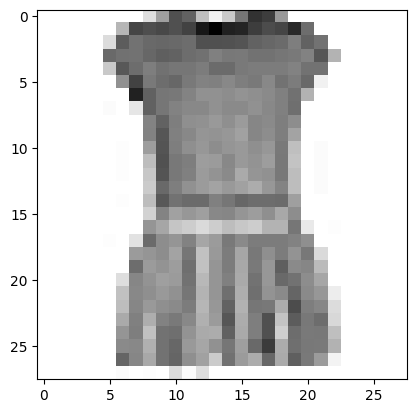

In [31]:
plt.imshow(x_train[3].reshape(28, 28), cmap=plt.cm.binary)
plt.show()